In [ ]:
import numpy as np
print("ok")

ok


In [ ]:
import pandas as pd
print("ok")

ok


In [ ]:
import matplotlib.pyplot as plt
print("ok")

ok


In [ ]:
import seaborn as sns
print("ok")

ok


In [ ]:
import spacy
print("ok")

ok


In [ ]:
import nltk
print("ok")

ok


In [ ]:
import re
print("ok")

ok


In [ ]:
import string

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from collections import Counter
print("ok")

ok


In [ ]:
np.random.seed(27)

In [ ]:
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = [20.0, 8.0]

In [ ]:
plt.rcParams.update({'font.size': 23,})


In [ ]:
sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)
print("ok")

ok


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving Musical_instruments_reviews.csv to Musical_instruments_reviews.csv


In [ ]:
import io


In [ ]:
raw_data = pd.read_csv(io.BytesIO(uploaded['Musical_instruments_reviews.csv']))
print("ok")

ok


In [ ]:
print(raw_data.shape)

(10261, 11)


In [ ]:
raw_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Unnamed: 9,target
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",NaN,1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",NaN,1
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",NaN,1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",NaN,1
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",NaN,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

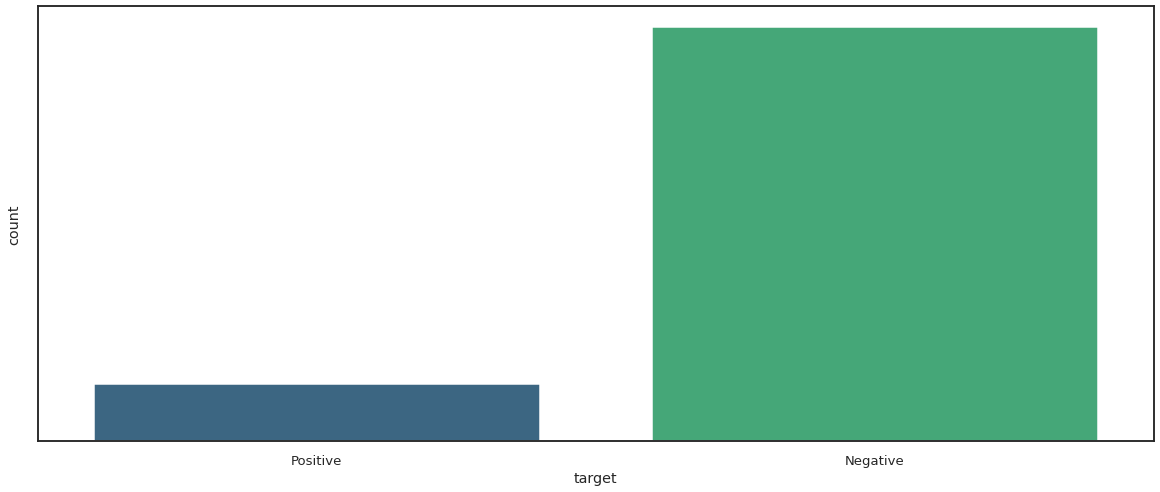

In [ ]:
fig, ax = plt.subplots()
g = sns.countplot(raw_data.target, palette='viridis')
g.set_xticklabels(['Positive', 'Negative'])
g.set_yticklabels([])


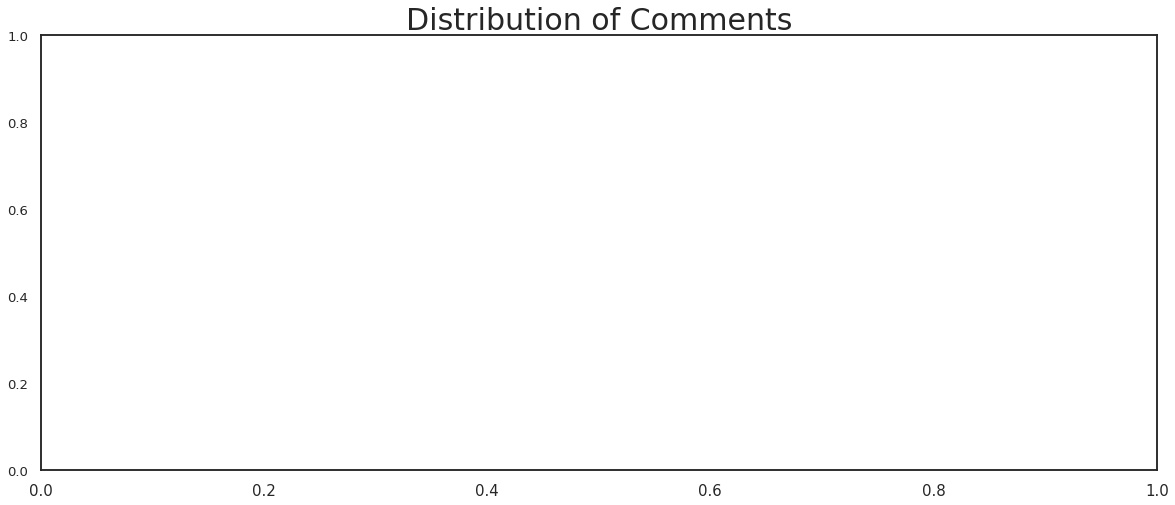

In [ ]:
# function to show values on bars
def show_values_on_bars(axs):
  def _show_on_single_plot(ax):
    for p in ax.patches:
      _x = p.get_x() + p.get_width() / 2
      _y = p.get_y() + p.get_height()
      value = '{:.0f}'.format(p.get_height())
      ax.text(_x, _y, value, ha="center")

  if isinstance(axs, np.ndarray):
    for idx, ax in np.ndenumerate(axs):
      _show_on_single_plot(ax)
  else:
    _show_on_single_plot(axs)

show_values_on_bars(ax)
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Comments', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('classes.png')
plt.show()






In [ ]:
(len(raw_data.loc[raw_data.target==1])) / (len(raw_data.loc[raw_data.target == 0])) * 100


728.1678773204197

In [ ]:
import random

In [ ]:
index = random.sample(raw_data.index[raw_data.target == 1].tolist(), 5)
for i in index:
  print(raw_data.iloc[i, 6])

Love it
Give em some time, you'll like em!
Truly one of the best.
Everything is in order now
Nice value!


In [ ]:
df = raw_data.sample(frac=0.3)
df.shape


(3078, 11)

In [ ]:
nlp = spacy.load('en')

In [ ]:
df['tokens'] = [nlp(text, # disable parts of the language processing
#pipeline we don't need here to speed up processing
 disable=['ner', # named entity recognition
 'tagger', # part-of-speech tagger
 'textcat', # document label categorizer
 ]) for text in df.summary]
df.sample(5)
print("ok")


ok


In [ ]:
df['num_tokens'] = [len(token) for token in df.tokens]
df.sample(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Unnamed: 9,target,tokens,num_tokens
4811,A3CUYX2VXZM9KO,B000J5XS3C,Jay,"[0, 0]",the Beringer 802 mixer is by far the lowest co...,5,A Lot of Bang for the Buck !!,1355443200,"12 14, 2012",NaN,1,"(A, Lot, of, Bang, for, the, Buck, !, !)",9
5745,A8MQNZK3J0UEX,B000VJ2VCK,Paul C.,"[0, 0]",Pretty straight forward bench. I was surprised...,5,Cool product,1329868800,"02 22, 2012",NaN,1,"(Cool, product)",2
2062,A3MRBUCGH66JTY,B0002F7IN0,"K. Andrews ""Permanent tourist""","[1, 1]","I'm very happy with this stand. It is heavy, ...",5,Sturdy and well made,1332720000,"03 26, 2012",NaN,1,"(Sturdy, and, well, made)",4
3985,A2Y4PRG2HHOL3G,B0009G1E0K,'brother' Bill,"[0, 0]","&#34;Nice for the price&#34; ... practical, ev...",3,Cheap & Good,1387584000,"12 21, 2013",NaN,0,"(Cheap, &, Good)",3
9377,A10FM4ILBIMJJ7,B005PGGU9O,Sim,"[0, 0]",This appears to be a good sturdy capo with a s...,5,Great for the money spent.,1381795200,"10 15, 2013",NaN,1,"(Great, for, the, money, spent, .)",6


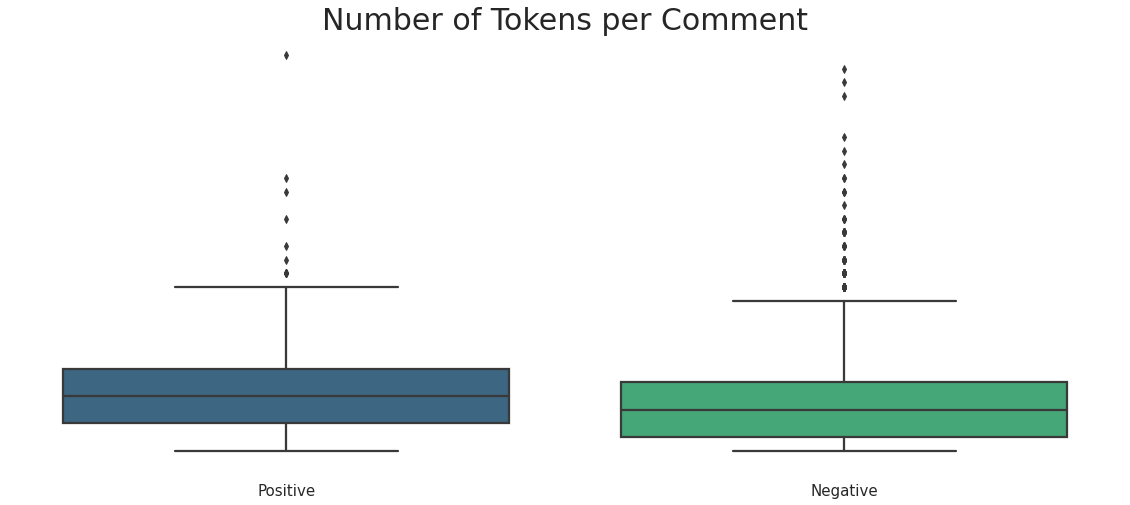

In [ ]:
fig, ax = plt.subplots()
g = sns.boxplot(x=df.target, y=df.num_tokens, palette='viridis')
g.set_xticklabels(['Positive', 'Negative'])
g.set_yticklabels([])
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Tokens per Comment', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('tokens.png')
plt.show()

In [ ]:
sents = [list(x.sents) for x in df.tokens]
df['num_sents'] = [len(sent) for sent in sents]
df.sample(5)



,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Unnamed: 9,target,tokens,num_tokens,num_sents
9608,AAHV0LYDMZGY8,B0078YF9V6,Bryan Harvey,"[10, 12]",Okay... just strung these up and ran them thro...,3,a little too bright and high output for classi...,1332028800,"03 18, 2012",NaN,0,"(a, little, too, bright, and, high, output, fo...",15,1
3484,A28DVY0Q6PPO1J,B0002PBS6S,Tatiana Montenegro,"[0, 0]",the only strings I get are Ernie Ball strings....,5,strings,1360540800,"02 11, 2013",NaN,1,(strings),1,1
6799,A2MPM6M93OXIJT,B001PGXHX0,Linda Noullet,"[0, 0]",I have a few different brands of picks at home...,5,A nice pick - good feel,1330128000,"02 25, 2012",NaN,1,"(A, nice, pick, -, good, feel)",6,1
7993,A18C03TA8N26L4,B003K16N0C,Javier Fernandez,"[2, 2]","Nice presentation, although the harmonicas are...",4,Lots of fun,1309910400,"07 6, 2011",NaN,1,"(Lots, of, fun)",3,1
51,A2U1Z3TZ4P76JB,B000068NW5,C. Zemer,"[0, 0]",Bought this for my daughter along with her new...,5,Cable works as described,1393977600,"03 5, 2014",NaN,1,"(Cable, works, as, described)",4,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


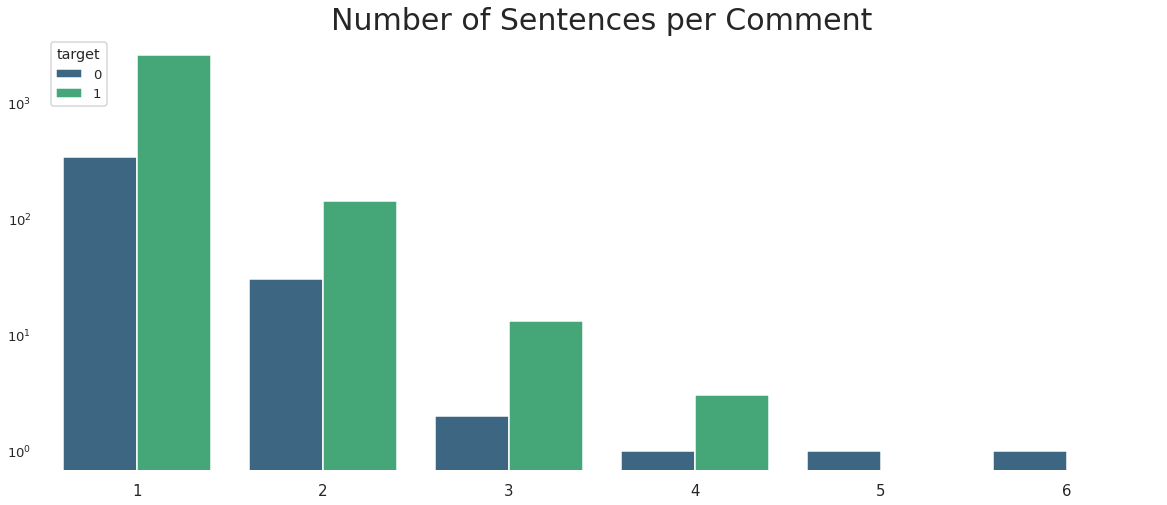

In [ ]:
fig, ax = plt.subplots()
g = sns.countplot(df.num_sents, hue=df.target, palette='viridis')
#g.set_xticklabels(['Positive', 'Negative'])
g.set_yticklabels([])
# using log scale on y-axis so we can better see the questions with more
#sentences
ax.set(yscale='log')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Sentences per Comment', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('comment.png')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
punctuations = string.punctuation
stop_words = set(stopwords.words("english"))

ok


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


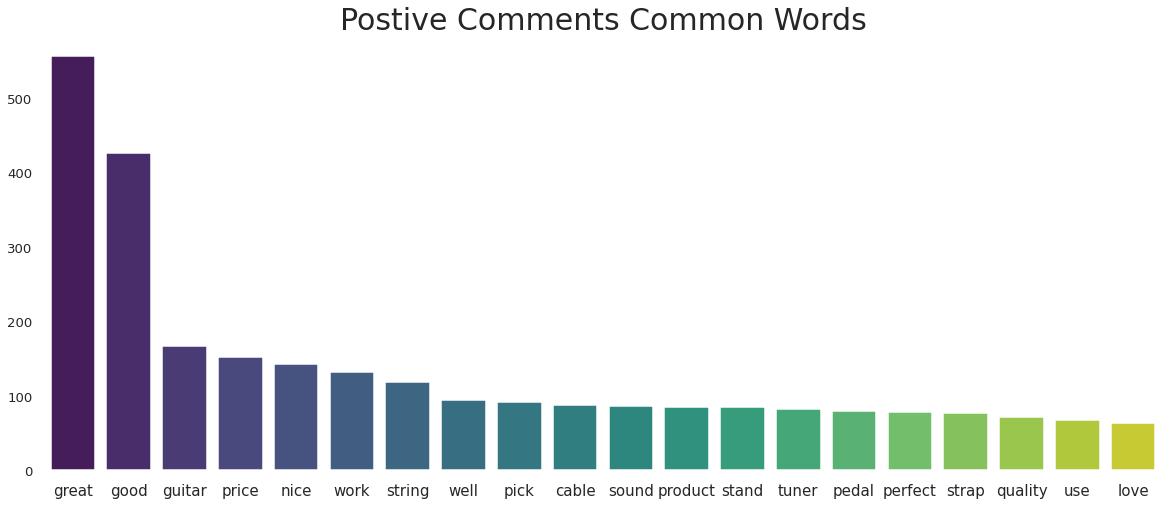

In [ ]:
def cleanup_text(docs):
  texts = []
  for doc in docs:
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = nlp(doc, disable=['ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_!= '-PRON-']
    tokens = [tok for tok in tokens if tok not in stop_words and tok not in punctuations]
    tokens = ' '.join(tokens)
    texts.append(tokens)
  return pd.Series(texts)
print("ok")
positive_text = [text for text in df[df['target'] == 1]['summary']]
positive_clean = cleanup_text(positive_text)
positive_clean = ' '.join(positive_clean).split()
positive_counts = Counter(positive_clean)
positive_common_words = [word[0] for word in
positive_counts.most_common(20)]
positive_common_counts = [word[1] for word in
positive_counts.most_common(20)]
sns.barplot(positive_common_words, positive_common_counts,
palette='viridis')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Postive Comments Common Words', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('positive_words.png')
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


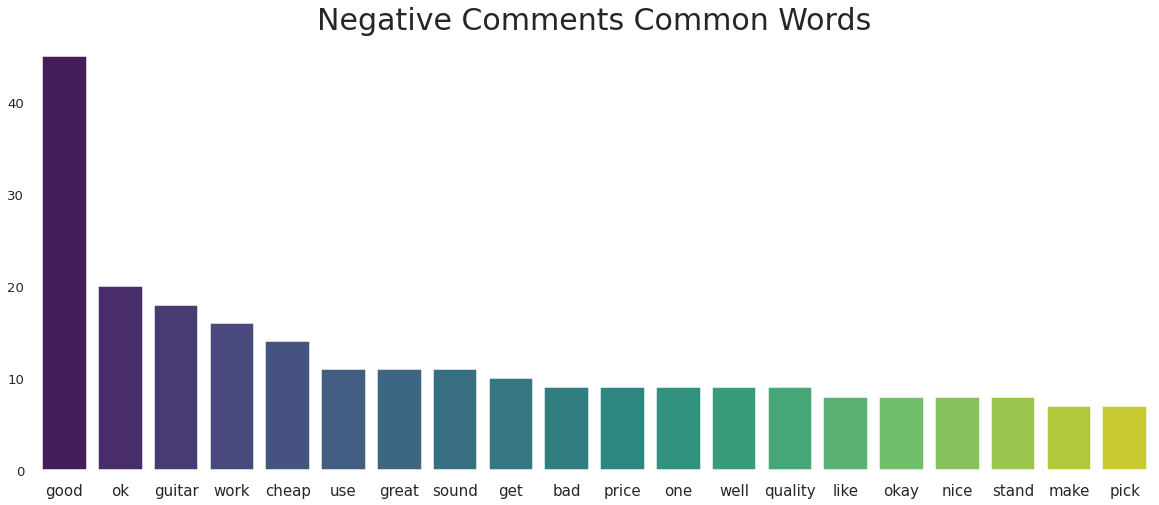

In [ ]:
negative_text = [text for text in df[df['target'] == 0]['summary']]
negative_clean = cleanup_text(negative_text)
negative_clean = ' '.join(negative_clean).split()
negative_counts = Counter(negative_clean)
negative_common_words = [word[0] for word in
negative_counts.most_common(20)]
negative_common_counts = [word[1] for word in
negative_counts.most_common(20)]
sns.barplot(negative_common_words, negative_common_counts,
palette='viridis')
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Negative Comments Common Words', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
fig.savefig('negative_words.png')
plt.show()